In [1]:
import h5py
import pylab as pl
import numpy as np
import scipy.stats as sp
import matplotlib as mpl
import networkx

In [2]:
def split_unique_id(unique_id):
    """Splits the ids assign to the subhalos by the merger tree code by snap number and subfind number """
    subfind_number = int(unique_id % 1e6)
    snap_number = int((unique_id - subfind_number) / 1e6)
    
    return snap_number, subfind_number

def get_main_branch_unique_ids(subtree, node):
    """Gets the unique ids of the subhalos belonging to the main branch of the selected subhalo (node)"""
    mpb = [node, ]
    i = 0
    while True:
        succesors = list(subtree.successors(node))
        if len(succesors) == 0:
            break
        node = succesors[0] # select only the first succesor (main branch)
        mpb.append(node)
        
    return mpb

In [3]:
pl.rc('font', size = 20)
pl.rc('legend', fontsize = 20)

In [4]:
sim = h5py.File('/data/cielo/simulations/LG1/LG1.hdf5', 'r')

In [5]:
trees = networkx.read_multiline_adjlist('/data/cielo/simulations/LG1/LG1_tree.dat')

In [6]:
snap0 = sim['SnapNumber_128']
snap0.keys()

<KeysViewHDF5 ['Groups', 'Header', 'PartType0', 'PartType1', 'PartType4', 'PartType5', 'SubGroups']>

In [7]:
Header = snap0['Header']
Header.keys()

<KeysViewHDF5 ['BoxSize', 'HubbleParam', 'MassTable', 'Omega0', 'OmegaLambda', 'Redshift', 'Time']>

In [8]:
z = Header['Redshift'][()]
z

2.220446049250313e-16

In [9]:
#first, a list of zs
Zs, snapN = [], []

for i in range(128, 29, -1):
    sname = 'SnapNumber_{}/Header/Redshift'.format(i)
    zt = sim[sname][()]
    Zs.append(zt)
    snapN.append(i)

Zs, snapN = np.array(Zs), np.array(snapN)
Zs

array([2.22044605e-16, 2.22044605e-16, 1.16323691e-02, 2.34529576e-02,
       3.54671017e-02, 4.76803722e-02, 6.00985761e-02, 7.27278089e-02,
       8.55744153e-02, 9.86450693e-02, 1.11946745e-01, 1.25486754e-01,
       1.39272749e-01, 1.53312783e-01, 1.67615301e-01, 1.82189180e-01,
       1.97043732e-01, 2.12188790e-01, 2.27634677e-01, 2.43392258e-01,
       2.59473023e-01, 2.75889083e-01, 2.92653186e-01, 3.09778865e-01,
       3.27280376e-01, 3.45172835e-01, 3.63472248e-01, 3.82195590e-01,
       4.01360855e-01, 4.20987181e-01, 4.41094881e-01, 4.61705611e-01,
       4.82842405e-01, 5.04529855e-01, 5.26794201e-01, 5.49663484e-01,
       5.73167723e-01, 5.97339064e-01, 6.22212005e-01, 6.47823588e-01,
       6.74213684e-01, 7.01425203e-01, 7.29504462e-01, 7.58501507e-01,
       7.88470444e-01, 8.19469998e-01, 8.51563899e-01, 8.84821496e-01,
       9.19318348e-01, 9.55137018e-01, 9.92367868e-01, 1.03111004e+00,
       1.07147251e+00, 1.11357545e+00, 1.15755164e+00, 1.20354826e+00,
      

In [10]:
def getNeaSnap(z, Zs, snapN):
    """Return the snapshot number closest to the redshfit z, where Zs and snapN are a list of redshifts and snapshots"""
    ii = np.searchsorted(Zs, z)
    if z - Zs[ii-1] < Zs[ii]-z:
        return snapN[ii-1]
    else:
        return snapN[ii]

In [11]:
getNeaSnap(.15, Zs, snapN)

115

In [12]:
sim['SnapNumber_115/Header/Redshift'][()], sim['SnapNumber_115/Header/Redshift'][()], sim['SnapNumber_115/Header/Redshift'][()]

(0.15331278299862494, 0.15331278299862494, 0.15331278299862494)

In [13]:
# apparently it works, lets get the fofID for a given stuff

def getFofId(fofZ0, z, tree, Zs, snapN):
    """return the snapshot and the fofid of the main progenitor of the fofz0 subgroup at redhsift z"""
    uniqueID0 = int(127*1e6+fofZ0)
    stree = networkx.dfs_tree(tree, str(uniqueID0))
    mtree = get_main_branch_unique_ids(stree, str(uniqueID0))
    snapZ = getNeaSnap(z, Zs, snapN)
    numberFoF, nsnapL = [], [] 
    for m in mtree:
        tsnapN, tsfid = split_unique_id(int(m))
        numberFoF.append(tsfid)
        nsnapL.append(tsnapN)
    numberFoF, nsnapL = np.array(numberFoF), np.array(nsnapL)
    iid = np.where(nsnapL==snapZ)
    if iid[0].size > 0:
        iid = iid[0][0]
    else:
        raise Exception('The subgroup {} has no progenitors at redshift {}'.format(fofZ0, z))
    return snapZ, numberFoF[iid]

In [14]:
getFofId(3, 0.2, trees, Zs, snapN)

(112, 2)

In [15]:
stree = networkx.dfs_tree(trees, '127000003')
mtree = get_main_branch_unique_ids(stree, '127000003')

In [16]:
mtree

['127000003',
 '126000003',
 '125000003',
 '124000005',
 '123000003',
 '122000003',
 '121000003',
 '120000469',
 '119000003',
 '118000472',
 '117000477',
 '116000473',
 '115000470',
 '114000457',
 '113000395',
 '112000002',
 '111000002',
 '110000002',
 '109000002',
 '108000002',
 '107000003',
 '106000004',
 '105000135',
 '104000003',
 '103000127',
 '102002688',
 '101000129',
 '100002502',
 '99003209',
 '98003027',
 '97000563',
 '96003143',
 '95000507',
 '94000496',
 '93000515',
 '92000428',
 '91000585',
 '90000602',
 '89000451',
 '88000564',
 '87000562',
 '86000570',
 '85000413',
 '84000399',
 '83000036',
 '82000034',
 '81000033',
 '80000044',
 '79000047',
 '78000052',
 '77000457',
 '76000444',
 '75000500',
 '74000481',
 '73000513',
 '72000485',
 '71000509',
 '70000458',
 '69000509',
 '68000510',
 '67000434',
 '66000523',
 '65000544',
 '64000570',
 '63000494',
 '62000499',
 '61000582',
 '60000499',
 '59003644',
 '58003519',
 '57003476',
 '56002850',
 '55006367',
 '54006200',
 '53006145

In [17]:
sim['SnapNumber_128/PartType0/Coordinates'].attrs['description_units']

'$h^{-1} ckpc$'

In [18]:
# ok,  it works, lets select the corresponding particles (stars, but works) at z=2 and at z=0, for fofid 1 at z=0
# first we need both set of offsets (Is the phrase "set of offsets" redundant?)
offZ0 = sim['SnapNumber_127/SubGroups/PartType0/Offsets'][1].astype(int)
snapZ2, fofZ2 = getFofId(1, .2, trees, Zs, snapN)
offZ2 = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snapZ2)][fofZ2].astype(int)

In [19]:
# and now I can read the particles at both redshifts, but I need the positions at Z0 of the particles 
CoorStarsZ0 = sim['SnapNumber_127/PartType0/Coordinates'][offZ0[0]:offZ0[1]]

starsZ0all = sim['SnapNumber_127/PartType0/ParticleIDs'][()] # I need all particles
starsZ2 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZ2)][offZ2[0]:offZ2[1]]

In [20]:
# and look for the particles that were part of the subhalo at z=2 at z=0
Ids = np.in1d(starsZ0all, starsZ2)
Ids2 = np.where(Ids)[0] #Create a index array where  IDs == True

In [21]:
CoorStarsZ2atZ0 = sim['SnapNumber_127/PartType0/Coordinates'][Ids2]

Text(0, 0.5, 'z/ckpc')

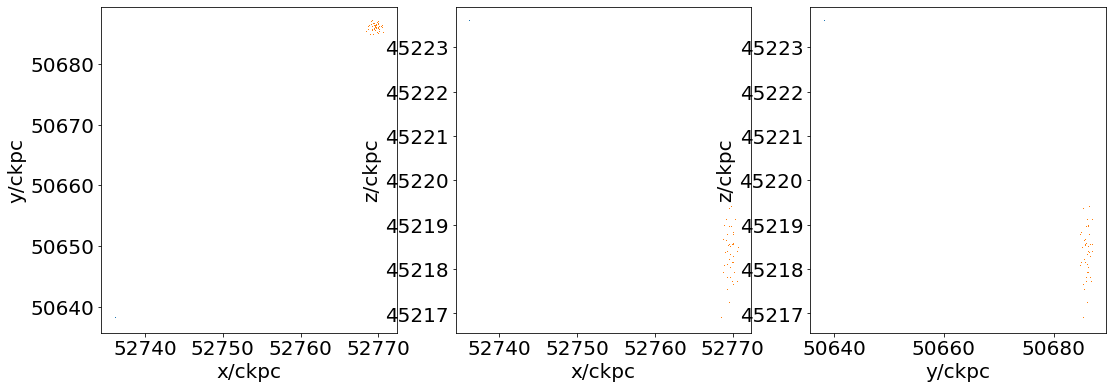

In [22]:
# and lets take a look
pl.figure(figsize=(18,6))

xz0, yz0, zz0 = CoorStarsZ0[:,0], CoorStarsZ0[:,1], CoorStarsZ0[:,2]
xz2, yz2, zz2 = CoorStarsZ2atZ0[:,0], CoorStarsZ2atZ0[:,1], CoorStarsZ2atZ0[:,2]

pl.subplot(1,3,1)
pl.plot(xz2, yz2, marker=',', ls=' ')
pl.plot(xz0, yz0, marker=',', ls=' ')

pl.xlabel('x/ckpc')
pl.ylabel('y/ckpc')

pl.subplot(1, 3, 2)
pl.plot(xz2, zz2, marker=',', ls=' ')
pl.plot(xz0, zz0, marker=',', ls=' ')

pl.xlabel('x/ckpc')
pl.ylabel('z/ckpc')

pl.subplot(1, 3, 3)
pl.plot(yz2, zz2, marker=',', ls=' ')
pl.plot(yz0, zz0, marker=',', ls=' ')

pl.xlabel('y/ckpc')
pl.ylabel('z/ckpc')

In [23]:
#projection?
# PMat = sim['SnapNumber_127/SubGroups/PartType0/RotationMatrix'][1]

In [24]:
# PMat

In [25]:
# rotCoorZ0 = []
# for co in CoorStarsZ0:
#     rotC = np.matmul(PMat, co)
#     rotCoorZ0.append(rotC)

# rotCoorZ0 = np.array(rotCoorZ0)

In [26]:
# pl.figure(figsize=(18,12))

# xz0, yz0, zz0 = rotCoorZ0[:,0], rotCoorZ0[:,1], rotCoorZ0[:,2]
# xznr, yznr, zznr = CoorStarsZ0[:,0], CoorStarsZ0[:,1], CoorStarsZ0[:,2]

# pl.subplot(2,3,1)
# pl.plot(xz0, yz0, marker=',', ls=' ')

# pl.xlabel('x/(ckpc h^{-1})')
# pl.ylabel('y/(ckpc h^{-1})')

# pl.subplot(2, 3, 2)
# pl.plot(xz0, zz0, marker=',', ls=' ')

# pl.xlabel('x/(ckpc h^{-1})')
# pl.ylabel('z/(ckpc h^{-1})')

# pl.subplot(2, 3, 3)
# pl.plot(yz0, zz0, marker=',', ls=' ')

# pl.xlabel('y/(ckpc h^{-1})')
# pl.ylabel('z/(ckpc h^{-1})')

# pl.subplot(2,3,4)
# pl.plot(xznr, yznr, marker=',', ls=' ')

# pl.xlabel('x/(ckpc h^{-1})')
# pl.ylabel('y/(ckpc h^{-1})')

# pl.subplot(2, 3, 5)
# pl.plot(xznr, zznr, marker=',', ls=' ')

# pl.xlabel('x/(ckpc h^{-1})')
# pl.ylabel('z/(ckpc h^{-1})')

# pl.subplot(2, 3, 6)
# pl.plot(yznr, zznr, marker=',', ls=' ')

# pl.xlabel('y/(ckpc h^{-1})')
# pl.ylabel('z/(ckpc h^{-1})')

In [27]:
#sim['SnapNumber_127/SubGroups/PartType0/RotationMatrix'][1], sim['SnapNumber_127/SubGroups/PartType4/RotationMatrix'][1] 

In [28]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'z/(ckpc h^{-1})')

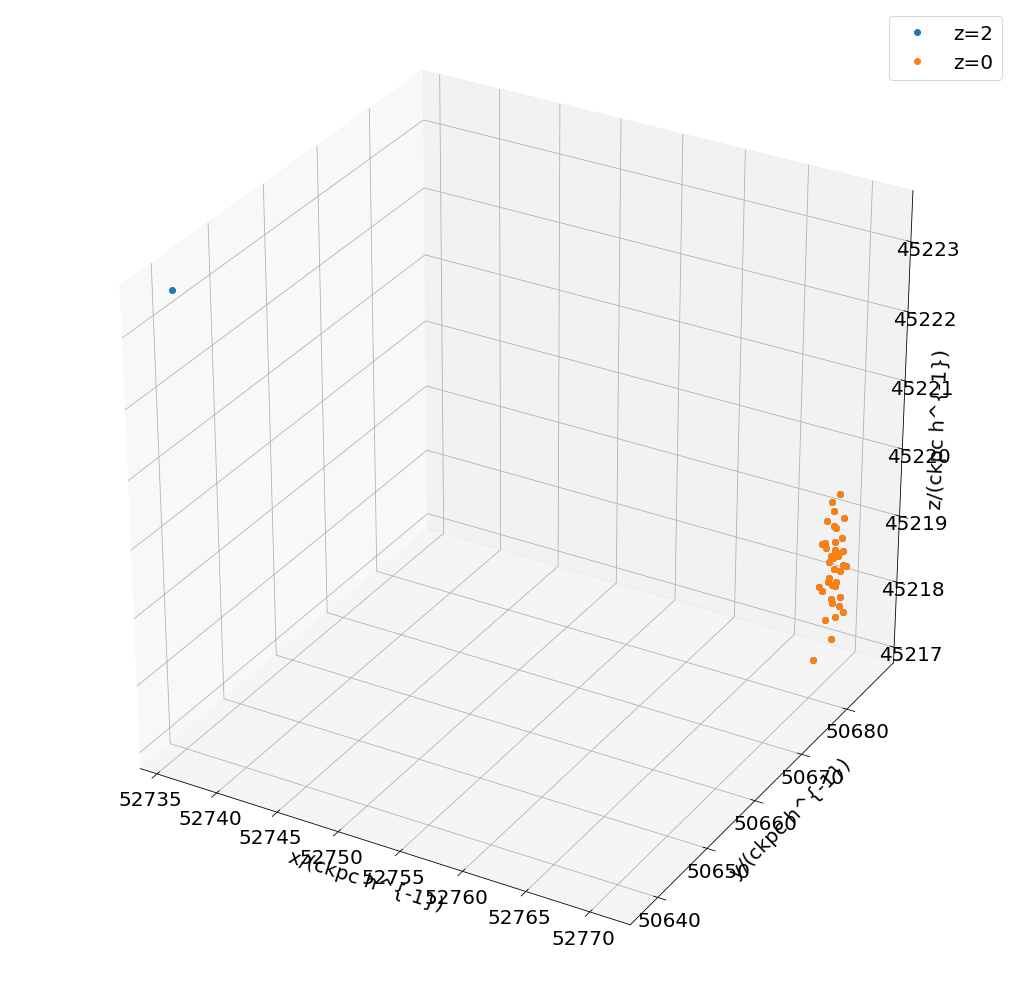

In [29]:
fig = pl.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(xs, ys, zs, c=c, marker=m)
xz0, yz0, zz0 = CoorStarsZ0[:,0], CoorStarsZ0[:,1], CoorStarsZ0[:,2]
xz2, yz2, zz2 = CoorStarsZ2atZ0[:,0], CoorStarsZ2atZ0[:,1], CoorStarsZ2atZ0[:,2]

#ax.scatter(xz2, yz2, zz2, marker=',', label='z=2', zorder=-20)
#ax.scatter(xz0, yz0, zz0, marker='o', label='z=0', zorder=10)

ax.plot(xz2, yz2, zz2, marker='o', label='z=2', ls='', zorder=-20)
ax.plot(xz0, yz0, zz0, marker='o', label='z=0', ls='', zorder=10)

pl.legend(loc='best')
ax.set_xlabel('x/(ckpc h^{-1})')
ax.set_ylabel('y/(ckpc h^{-1})')
ax.set_zlabel('z/(ckpc h^{-1})')

Text(0.5, 0, 'z/(ckpc h^{-1})')

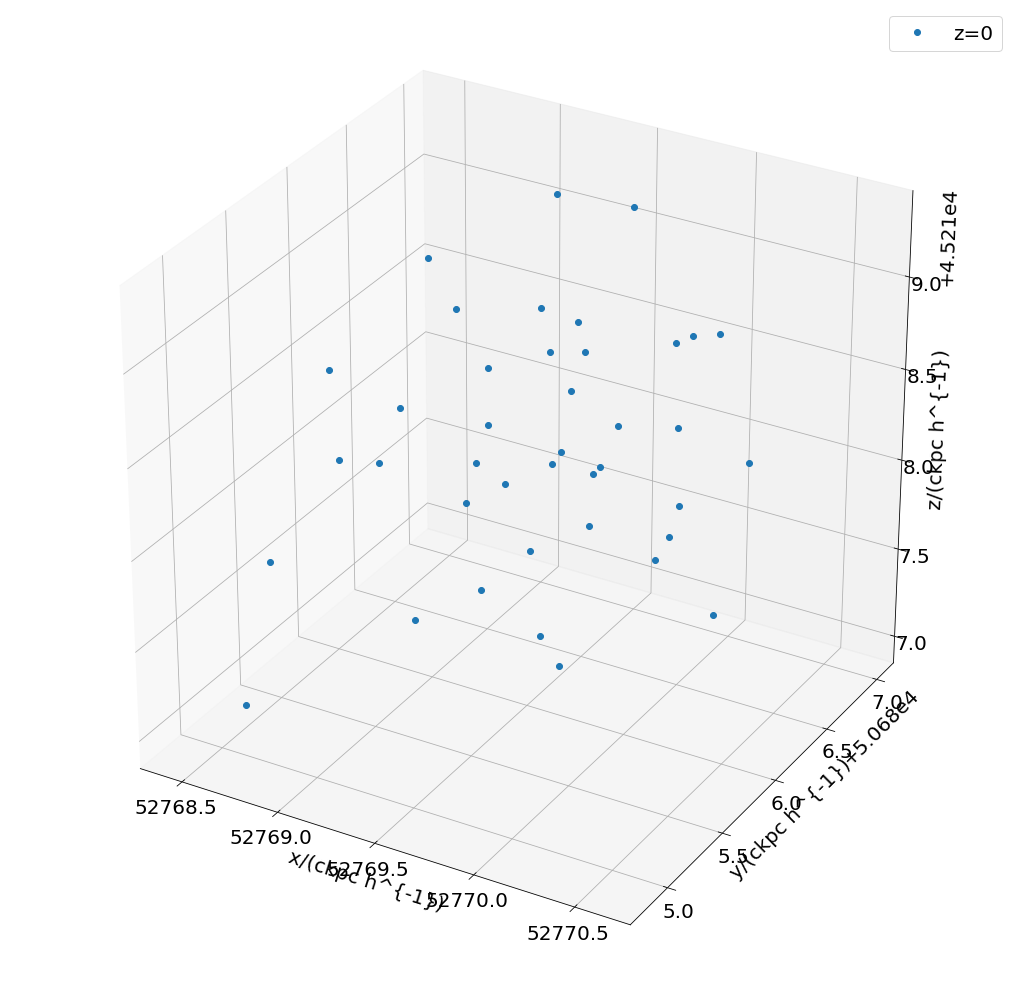

In [30]:
fig = pl.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(xs, ys, zs, c=c, marker=m)
xz0, yz0, zz0 = CoorStarsZ0[:,0], CoorStarsZ0[:,1], CoorStarsZ0[:,2]
xz2, yz2, zz2 = CoorStarsZ2atZ0[:,0], CoorStarsZ2atZ0[:,1], CoorStarsZ2atZ0[:,2]

#ax.scatter(xz2, yz2, zz2, marker=',', label='z=2', zorder=-20)
#ax.scatter(xz0, yz0, zz0, marker='o', label='z=0', zorder=10)

#ax.plot(xz2, yz2, zz2, marker='o', label='z=2', ls='', zorder=-20)
ax.plot(xz0, yz0, zz0, marker='o', label='z=0', ls='', zorder=10)

pl.legend(loc='best')
ax.set_xlabel('x/(ckpc h^{-1})')
ax.set_ylabel('y/(ckpc h^{-1})')
ax.set_zlabel('z/(ckpc h^{-1})')

In [31]:
# and several redshifts
fofID = 85
centralID = 81

offZ0 = sim['SnapNumber_127/SubGroups/PartType0/Offsets'][fofID].astype(int)
snapZp5, fofZp5 = getFofId(fofID, 0.5, trees, Zs, snapN)
snapZ1, fofZ1 = getFofId(fofID, 1, trees, Zs, snapN)
snapZ1p5, fofZ1p5 = getFofId(fofID, 1.5, trees, Zs, snapN)
snapZ2, fofZ2 = getFofId(fofID, 2, trees, Zs, snapN)

In [32]:
offZp5 = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snapZp5)][fofZp5].astype(int)
offZ1 = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snapZ1)][fofZ1].astype(int)
offZ1p5 = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snapZ1p5)][fofZ1p5].astype(int)
offZ2 = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snapZ2)][fofZ2].astype(int)

In [33]:
offZ0, offZp5, offZ1, offZ1p5, offZ2

(array([595889, 596167]),
 array([859013, 859359]),
 array([825474, 825936]),
 array([699327, 699935]),
 array([670638, 670843]))

In [34]:
CoorZ0 = sim['SnapNumber_127/PartType0/Coordinates'][offZ0[0]:offZ0[1]]

pZ0all = sim['SnapNumber_127/PartType0/ParticleIDs'][()] # I need all particles

pZp5 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZp5)][offZp5[0]:offZp5[1]]
pZ1 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZ1)][offZ1[0]:offZ1[1]]
pZ1p5 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZ1p5)][offZ1p5[0]:offZ1p5[1]]
pZ2 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZ2)][offZ2[0]:offZ2[1]]

In [35]:
IdsP5 = np.in1d(pZ0all, pZp5)
IdsP5_ = np.where(IdsP5)[0]

Ids1 = np.in1d(pZ0all, pZ1)
Ids1_ = np.where(Ids1)[0]

Ids1P5 = np.in1d(pZ0all, pZ1p5)
Ids1P5_ = np.where(Ids1P5)[0]

Ids2 = np.in1d(pZ0all, pZ2)
Ids2_ = np.where(Ids2)[0]

In [36]:
IdsP5_.size, Ids1_.size, Ids1P5_.size, Ids2_.size

(332, 428, 574, 177)

In [37]:
CoorZp5atZ0 = sim['SnapNumber_127/PartType0/Coordinates'][IdsP5_]
CoorZ1atZ0 = sim['SnapNumber_127/PartType0/Coordinates'][Ids1_]
CoorZ1p5atZ0 = sim['SnapNumber_127/PartType0/Coordinates'][Ids1P5_]
CoorZ2atZ0 = sim['SnapNumber_127/PartType0/Coordinates'][Ids2_]

Text(0, 0.5, 'z/(ckpc h^{-1})')

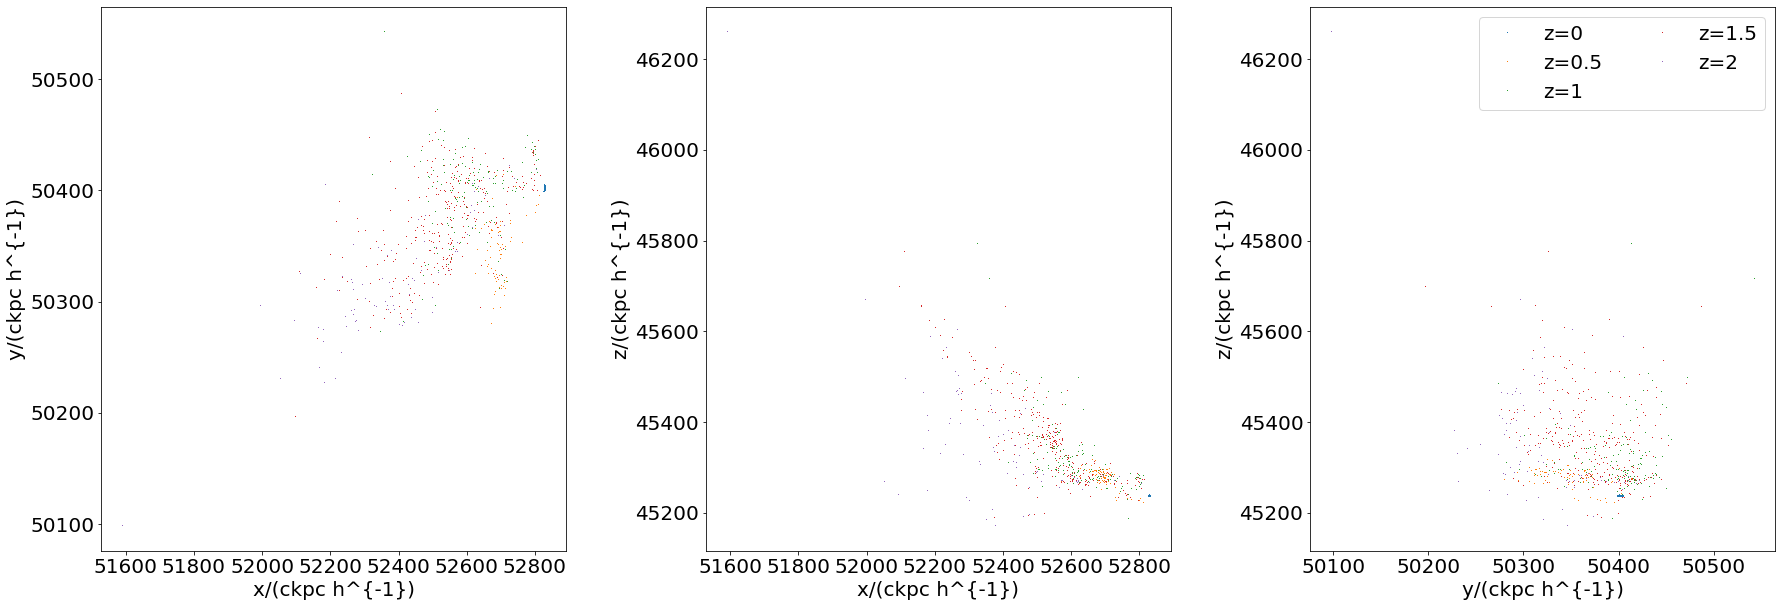

In [38]:
pl.figure(figsize=(30,10))

pl.subplots_adjust(wspace=0.3)

xz0, yz0, zz0 = CoorZ0[:,0], CoorZ0[:,1], CoorZ0[:,2]
xzp5, yzp5, zzp5 = CoorZp5atZ0[:,0], CoorZp5atZ0[:,1], CoorZp5atZ0[:,2]
xz1, yz1, zz1 = CoorZ1atZ0[:,0], CoorZ1atZ0[:,1], CoorZ1atZ0[:,2]
xz1p5, yz1p5, zz1p5 = CoorZ1p5atZ0[:,0], CoorZ1p5atZ0[:,1], CoorZ1p5atZ0[:,2]
xz2, yz2, zz2 = CoorZ2atZ0[:,0], CoorZ2atZ0[:,1], CoorZ2atZ0[:,2]

pl.subplot(1,3,1)
pl.plot(xz0, yz0, marker=',', ls=' ', label='z=0', zorder=10)
pl.plot(xzp5, yzp5, marker=',', ls=' ', label='z=0.5', zorder=8)
pl.plot(xz1, yz1, marker=',', ls=' ', label='z=1', zorder=6)
pl.plot(xz1p5, yz1p5, marker=',', ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, yz2, marker=',', ls=' ', label='z=2', zorder=2)

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('y/(ckpc h^{-1})')

pl.subplot(1, 3, 2)
pl.plot(xz0, zz0, marker=',', ls=' ', label='z=0', zorder=10)
pl.plot(xzp5, zzp5, marker=',', ls=' ', label='z=0.5', zorder=8)
pl.plot(xz1, zz1, marker=',', ls=' ', label='z=1', zorder=6)
pl.plot(xz1p5, zz1p5, marker=',', ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, zz2, marker=',', ls=' ', label='z=2', zorder=2)


pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

pl.subplot(1, 3, 3)
pl.plot(yz0, zz0, marker=',', ls=' ', label='z=0', zorder=10)
pl.plot(yzp5, zzp5, marker=',', ls=' ', label='z=0.5', zorder=8)
pl.plot(yz1, zz1, marker=',', ls=' ', label='z=1', zorder=6)
pl.plot(yz1p5, zz1p5, marker=',', ls=' ', label='z=1.5', zorder=4)
pl.plot(yz2, zz2, marker=',', ls=' ', label='z=2', zorder=2)

pl.legend(loc='best', ncol=2)

pl.xlabel('y/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

In [39]:
# z0centre = sim['SnapNumber_128/SubGroups/SubGroupPos'][fofID]
z0centre = sim['SnapNumber_127/SubGroups/SubGroupPos'][centralID]
# rotMat = sim['SnapNumber_128/SubGroups/PartType0/RotationMatrix'][fofID]

# CZ0, CZp5, CZ1, CZ1p5, CZ2 = [], [], [], [], []
# Z0cen = np.dot(rotMat, z0centre)

# for c0, c5, c1, c15, c2 in zip(CoorZ0, CoorZp5atZ0, CoorZ1atZ0, CoorZ1atZ0, CoorZ2atZ0):
#     c0t = np.dot(rotMat, c0)
#     c5t = np.dot(rotMat, c5)
#     c1t = np.dot(rotMat, c1)
#     c15t = np.dot(rotMat, c15)
#     c2t = np.dot(rotMat, c2)
    
#     CZ0.append(c0t)
#     CZp5.append(c5t)
#     CZ1.append(c1t)
#     CZ1p5.append(c15t)
#     CZ2.append(c15t)

# CZ0, CZp5, CZ1, CZ1p5, CZ2 = np.array(CZ0), np.array(CZp5), np.array(CZ1), np.array(CZ1p5), np.array(CZ2)

Text(0, 0.5, 'z/(ckpc h^{-1})')

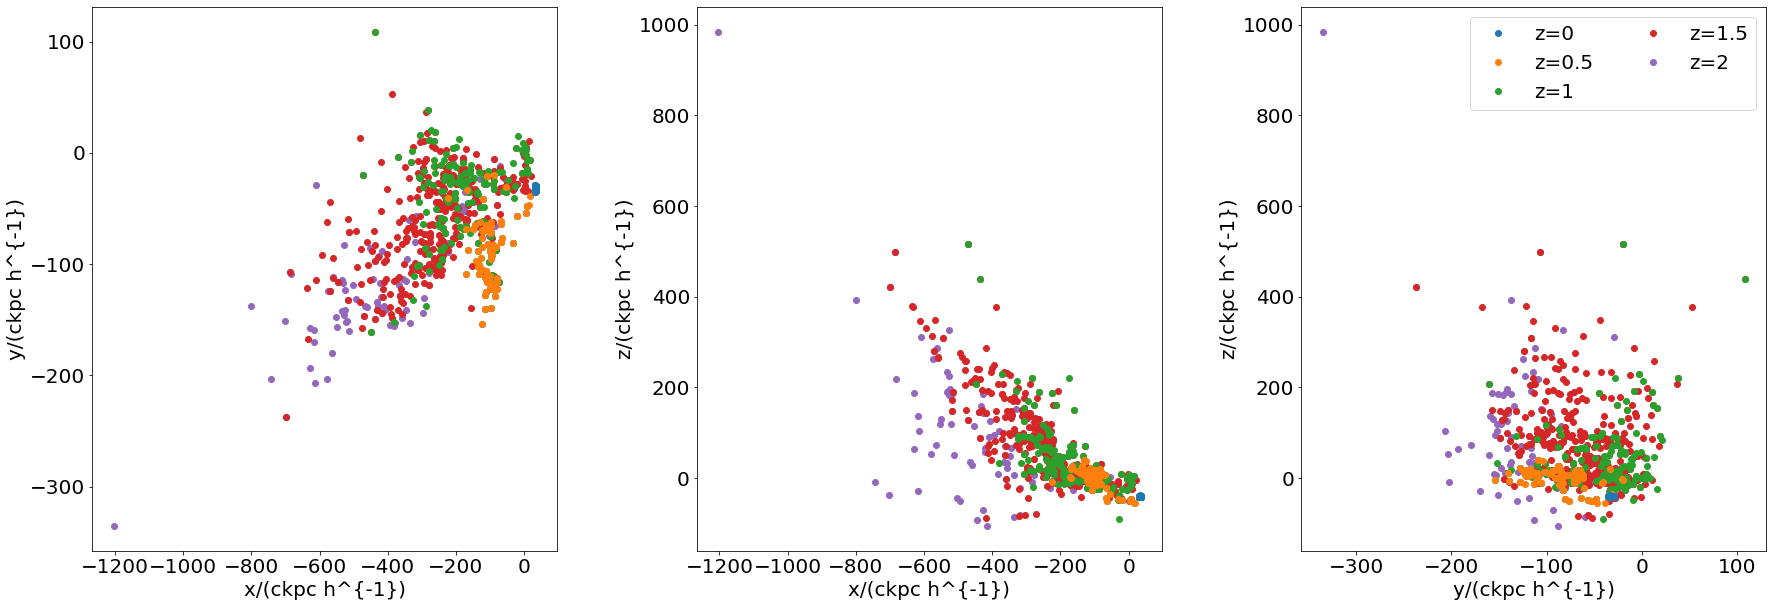

In [40]:
pl.figure(figsize=(30,10))

pl.subplots_adjust(wspace=0.3)

mark = 'o'

xz0, yz0, zz0 = CoorZ0[:,0], CoorZ0[:,1], CoorZ0[:,2]
xzp5, yzp5, zzp5 = CoorZp5atZ0[:,0], CoorZp5atZ0[:,1], CoorZp5atZ0[:,2]
xz1, yz1, zz1 = CoorZ1atZ0[:,0], CoorZ1atZ0[:,1], CoorZ1atZ0[:,2]
xz1p5, yz1p5, zz1p5 = CoorZ1p5atZ0[:,0], CoorZ1p5atZ0[:,1], CoorZ1p5atZ0[:,2]
xz2, yz2, zz2 = CoorZ2atZ0[:,0], CoorZ2atZ0[:,1], CoorZ2atZ0[:,2]


xz0, yz0, zz0 = xz0 - z0centre[0], yz0 - z0centre[1], zz0 - z0centre[2]
xzp5, yzp5, zzp5 = xzp5 - z0centre[0], yzp5 - z0centre[1], zzp5 - z0centre[2]
xz1, yz1, zz1 = xz1 - z0centre[0], yz1 - z0centre[1], zz1 - z0centre[2]
xz1p5, yz1p5, zz1p5 = xz1p5 - z0centre[0], yz1p5 - z0centre[1], zz1p5 - z0centre[2]
xz2, yz2, zz2 = xz2 - z0centre[0], yz2 - z0centre[1], zz2 - z0centre[2]

# xz0, yz0, zz0 = CZ0[:,0], CZ0[:,1], CZ0[:,2]
# xzp5, yzp5, zzp5 = CZp5[:,0], CZp5[:,1], CZp5[:,2]
# xz1, yz1, zz1 = CZ1[:,0], CZ1[:,1], CZ1[:,2]
# xz1p5, yz1p5, zz1p5 = CZ1p5[:,0], CZ1p5[:,1], CZ1p5[:,2]
# xz2, yz2, zz2 = CZ2[:,0], CZ2[:,1], CZ2[:,2]

# xz0, yz0, zz0 = xz0 - Z0cen[0], yz0 - Z0cen[1], zz0 - Z0cen[2]
# xzp5, yzp5, zzp5 = xzp5 - Z0cen[0], yzp5 - Z0cen[1], zzp5 - Z0cen[2]
# xz1, yz1, zz1 = xz1 - Z0cen[0], yz1 - Z0cen[1], zz1 - Z0cen[2]
# xz1p5, yz1p5, zz1p5 = xz1p5 - Z0cen[0], yz1p5 - Z0cen[1], zz1p5 - Z0cen[2]
# xz2, yz2, zz2 = xz2 - Z0cen[0], yz2 - Z0cen[1], zz2 - Z0cen[2]

pl.subplot(1,3,1)
pl.plot(xz0, yz0, marker=mark, ls=' ', label='z=0', zorder=10)
pl.plot(xzp5, yzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
pl.plot(xz1, yz1, marker=mark, ls=' ', label='z=1', zorder=6)
pl.plot(xz1p5, yz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, yz2, marker=mark, ls=' ', label='z=2', zorder=2)

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('y/(ckpc h^{-1})')

pl.subplot(1, 3, 2)
pl.plot(xz0, zz0, marker=mark, ls=' ', label='z=0', zorder=10)
pl.plot(xzp5, zzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
pl.plot(xz1, zz1, marker=mark, ls=' ', label='z=1.5', zorder=6)
pl.plot(xz1p5, zz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, zz2, marker=mark, ls=' ', label='z=2', zorder=2)


pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

pl.subplot(1, 3, 3)
pl.plot(yz0, zz0, marker=mark, ls=' ', label='z=0', zorder=10)
pl.plot(yzp5, zzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
pl.plot(yz1, zz1, marker=mark, ls=' ', label='z=1', zorder=6)
pl.plot(yz1p5, zz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(yz2, zz2, marker=mark, ls=' ', label='z=2', zorder=2)

deltaX = pl.xlim()
deltaX = deltaX[1]-deltaX[0]

pl.legend(loc='best', ncol=2)

pl.xlabel('y/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

In [41]:
velCen = sim['SnapNumber_128/SubGroups/SubGroupVel'][centralID]
velSat = sim['SnapNumber_128/SubGroups/SubGroupVel'][fofID]

cenRep = sim['SnapNumber_127/SubGroups/SubGroupPos'][fofID] - z0centre

velRep = velSat-velCen

vx, vy, vz = velRep[0], velRep[1], velRep[2]
xcen, ycen, zcen = cenRep[0], cenRep[1], cenRep[2]
# vx, vy, vz = vx/12, vy/12, vz/12 
vx, vy, vz

(26.376877, 49.49233, 11.948975)

Text(0, 0.5, 'z/(ckpc h^{-1})')

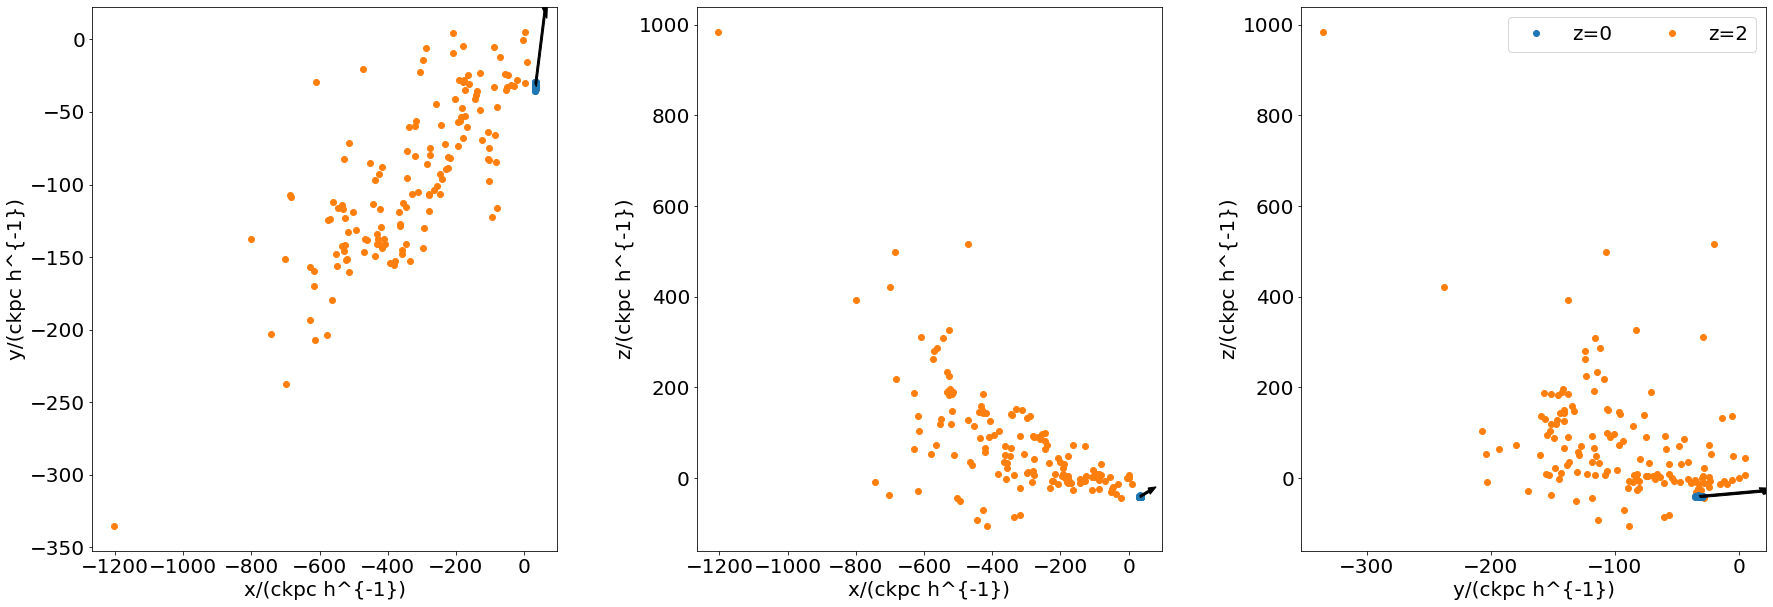

In [42]:
pl.figure(figsize=(30,10))

pl.subplots_adjust(wspace=0.3)

mark = 'o'

#xz0, yz0, zz0 = CoorZ0[:,0], CoorZ0[:,1], CoorZ0[:,2]
#xzp5, yzp5, zzp5 = CoorZp5atZ0[:,0], CoorZp5atZ0[:,1], CoorZp5atZ0[:,2]
#xz1, yz1, zz1 = CoorZ1atZ0[:,0], CoorZ1atZ0[:,1], CoorZ1atZ0[:,2]
#xz1p5, yz1p5, zz1p5 = CoorZ1p5atZ0[:,0], CoorZ1p5atZ0[:,1], CoorZ1p5atZ0[:,2]
#xz2, yz2, zz2 = CoorZ2atZ0[:,0], CoorZ2atZ0[:,1], CoorZ2atZ0[:,2]

#xz0, yz0, zz0 = xz0 - z0centre[0], yz0 - z0centre[1], zz0 - z0centre[2]
#xzp5, yzp5, zzp5 = xzp5 - z0centre[0], yzp5 - z0centre[1], zzp5 - z0centre[2]
#xz1, yz1, zz1 = xz1 - z0centre[0], yz1 - z0centre[1], zz1 - z0centre[2]
#xz1p5, yz1p5, zz1p5 = xz1p5 - z0centre[0], yz1p5 - z0centre[1], zz1p5 - z0centre[2]
#xz2, yz2, zz2 = xz2 - z0centre[0], yz2 - z0centre[1], zz2 - z0centre[2]

pl.subplot(1,3,1)
pl.plot(xz0, yz0, marker=mark, ls=' ', label='z=0', zorder=10)
#pl.plot(xzp5, yzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
#pl.plot(xz1, yz1, marker=mark, ls=' ', label='z=1', zorder=6)
#pl.plot(xz1p5, yz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, yz2, marker=mark, ls=' ', label='z=0.2', zorder=2)

pl.arrow(xcen, ycen, vx, vy, zorder=20, width=5, color='black')

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('y/(ckpc h^{-1})')

pl.subplot(1, 3, 2)
pl.plot(xz0, zz0, marker=mark, ls=' ', label='z=0', zorder=10)
#pl.plot(xzp5, zzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
#pl.plot(xz1, zz1, marker=mark, ls=' ', label='z=1', zorder=6)
#pl.plot(xz1p5, zz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(xz2, zz2, marker=mark, ls=' ', label='z=2', zorder=2)

pl.arrow(xcen, zcen, vx, vz, zorder=20, width=5, color='black')

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

pl.subplot(1, 3, 3)
pl.plot(yz0, zz0, marker=mark, ls=' ', label='z=0', zorder=10)
#pl.plot(yzp5, zzp5, marker=mark, ls=' ', label='z=0.5', zorder=8)
#pl.plot(yz1, zz1, marker=mark, ls=' ', label='z=1', zorder=6)
#pl.plot(yz1p5, zz1p5, marker=mark, ls=' ', label='z=1.5', zorder=4)
pl.plot(yz2, zz2, marker=mark, ls=' ', label='z=2', zorder=2)

pl.arrow(ycen, zcen, vy, vz, zorder=20, width=5, color='black')

pl.legend(loc='best', ncol=2)

pl.xlabel('y/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

In [43]:
# lest separate the ids that were part of the subgroups at z=0, but today are not:
pZ0 = sim['SnapNumber_127/PartType0/ParticleIDs'][offZ0[0]:offZ0[1]]
pZ2atZ0 = sim['SnapNumber_127/PartType0/ParticleIDs'][Ids2_]

IdsC = np.in1d(pZ2atZ0, pZ0)
#IdsC_ = np.where(IdsC==False)[0]

IdsC_ = Ids2_[np.where(IdsC==False)[0]]
IdsC_a = Ids2_[np.where(IdsC)[0]]

IdsC_.size, IdsC_a.size

(145, 32)

Text(0, 0.5, 'z/(ckpc h^{-1})')

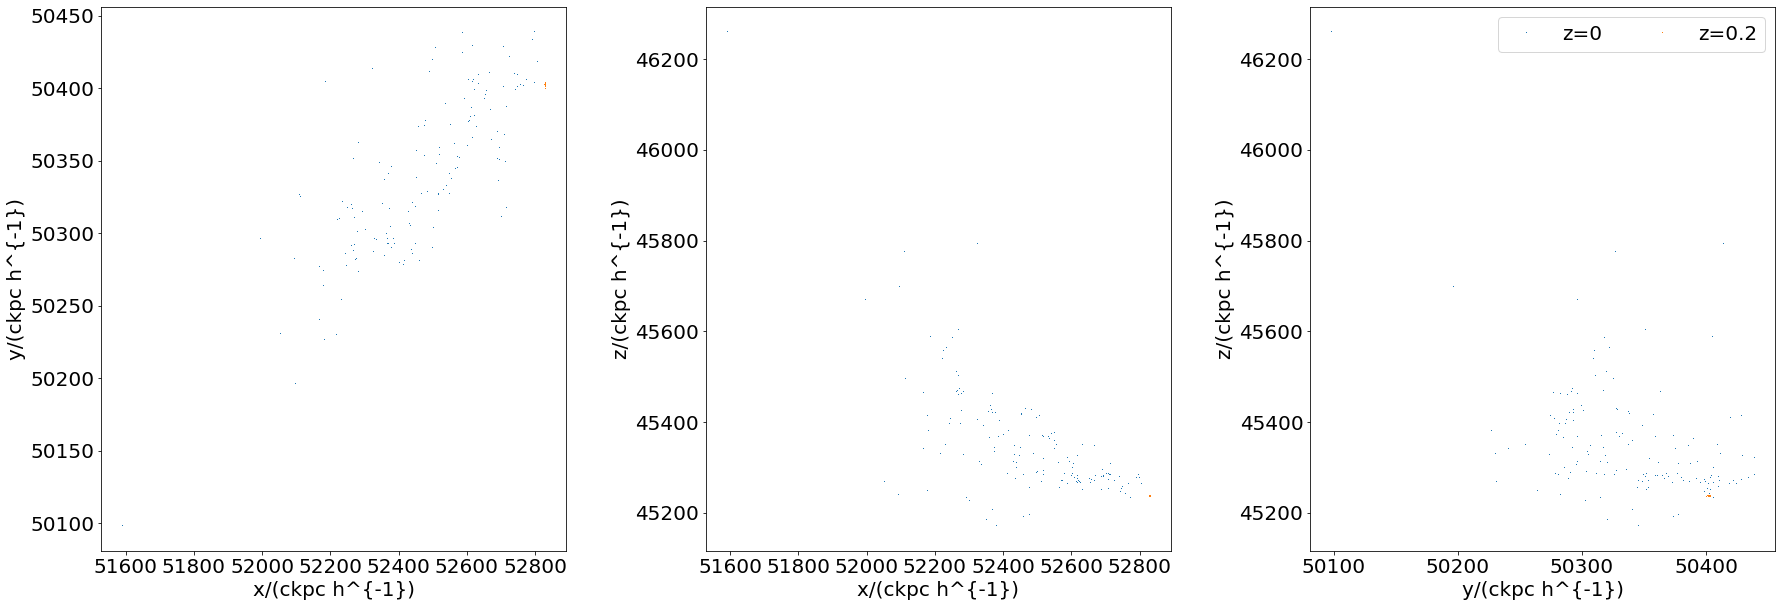

In [44]:
Pare = sim['SnapNumber_127/PartType0/Coordinates'][IdsC_]
Pnot = sim['SnapNumber_127/PartType0/Coordinates'][IdsC_a]

xx, yy, zz = Pare[:,0], Pare[:,1], Pare[:,2]
x2, y2, z2 = Pnot[:,0], Pnot[:,1], Pnot[:,2]

pl.figure(figsize=(30,10))

pl.subplots_adjust(wspace=0.3)

mark = ','

pl.subplot(1,3,1)
pl.plot(xx, yy, marker=mark, ls=' ', label='z=0.2', zorder=2)
pl.plot(x2, y2, marker=mark, ls=' ', label='z=0.2', zorder=10)

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('y/(ckpc h^{-1})')

pl.subplot(1, 3, 2)
pl.plot(xx, zz, marker=mark, ls=' ', label='z=0.2', zorder=2)
pl.plot(x2, z2, marker=mark, ls=' ', label='z=0.2', zorder=10)

pl.xlabel('x/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

pl.subplot(1, 3, 3)
pl.plot(yy, zz, marker=mark, ls=' ', label='z=0', zorder=2)
pl.plot(y2, z2, marker=mark, ls=' ', label='z=0.2', zorder=10)

pl.legend(loc='best', ncol=2)

pl.xlabel('y/(ckpc h^{-1})')
pl.ylabel('z/(ckpc h^{-1})')

In [45]:
#lets see stellar masses and stuff.
stOffsets = sim['SnapNumber_127/SubGroups/PartType4/Offsets'][fofID].astype('int')
StMassesZ0 = sim['SnapNumber_127/PartType4/Masses'][stOffsets[0]:stOffsets[1]]
GasMassesZ0 = sim['SnapNumber_127/PartType0/Masses'][offZ0[0]:offZ0[1]]
GasMassesNZ0 = sim['SnapNumber_127/PartType0/Masses'][IdsC_]
GassAbundancesNZ0 = sim['SnapNumber_127/PartType0/Abundances'][IdsC_]

In [46]:
print('Log Stellar Mass Z=0:',np.log10(np.sum(StMassesZ0)*1e10),'/log(M_{sun}/h)')
print('Log Gas Lost from Z=2:',np.log10(np.sum(GasMassesNZ0)*1e10),'/log(M_{sun}/h)')
print('Gas Mass:',np.log10(np.sum(GasMassesZ0)*1e10),'/log(M_{sun}/h)')

Log Stellar Mass Z=0: 6.873248132586129 /log(M_{sun}/h)
Log Gas Lost from Z=2: 7.463716264643538 /log(M_{sun}/h)
Gas Mass: 7.730795092676302 /log(M_{sun}/h)


In [47]:
sim['SnapNumber_127/PartType0/Abundances'].attrs['description_units']

'$10^{10}  h^{-1} M_\\odot$'

In [48]:
elements = ['He', 'C', 'Mg', 'O', 'Fe', 'Si', 'H', 'N', 'Ne', 'S', 'Ca', 'Zi']

for i, el in enumerate(elements):
    Abd = GassAbundancesNZ0[:,i]
    MassT = Abd
    print('Log {} Lost from Z=2:'.format(el),np.log10(np.sum(MassT)*1e10),'/log(M_{sun}/h)')
    
print('Total', np.log10(np.sum(GassAbundancesNZ0)*1e10), np.log10(np.sum(GasMassesNZ0)*1e10))

Log He Lost from Z=2: 6.848358982855046 /log(M_{sun}/h)
Log C Lost from Z=2: 3.6589634439472873 /log(M_{sun}/h)
Log Mg Lost from Z=2: 2.901693981305067 /log(M_{sun}/h)
Log O Lost from Z=2: 4.355005145398473 /log(M_{sun}/h)
Log Fe Lost from Z=2: 3.335490935409756 /log(M_{sun}/h)
Log Si Lost from Z=2: 3.46249614206438 /log(M_{sun}/h)
Log H Lost from Z=2: 7.342385631273461 /log(M_{sun}/h)
Log N Lost from Z=2: 0.936317978053936 /log(M_{sun}/h)
Log Ne Lost from Z=2: 3.3881292541778585 /log(M_{sun}/h)
Log S Lost from Z=2: 3.180349251500717 /log(M_{sun}/h)
Log Ca Lost from Z=2: 2.365683535752073 /log(M_{sun}/h)
Log Zi Lost from Z=2: 1.063018795218869 /log(M_{sun}/h)
Total 7.463716264643538 7.463716264643538


In [49]:
sim['SnapNumber_127/SubGroups/GroupNumber'][1],sim['SnapNumber_127/SubGroups/GroupNumber'][2],sim['SnapNumber_127/SubGroups/GroupNumber'][30],sim['SnapNumber_128/SubGroups/GroupNumber'][45]

(0, 0, 0, 1)

In [50]:
sim['SnapNumber_127/Groups/GroupNsubs'][0], sim['SnapNumber_127/Groups/GroupNsubs'][1], sim['SnapNumber_127/Groups/GroupNsubs'][3]

(32, 21, 24)

In [51]:
sim['SnapNumber_127/Groups/GroupCM'][0], sim['SnapNumber_127/SubGroups/GroupNumber'][1]

(array([52797.62 , 50642.95 , 45243.082], dtype=float32), 0)

In [52]:
# half massess
groups = sim['SnapNumber_127/SubGroups/GroupNumber'][()]
i1 = np.where(groups==0)[0]
massG1 = sim['SnapNumber_127/SubGroups/SubGroupHalfMass'][i1]

for ii, mm in zip(i1, massG1):
    print(ii, mm)

0 26.653896
1 1.8541731
2 2.0251598
3 1.6952
4 2.285183
5 2.041609
6 2.9097576
7 2.7454464
8 1.976107
9 2.1694005
10 2.35153
11 2.2030003
12 1.2043546
13 2.2717624
14 1.0037998
15 1.893097
16 1.2113217
17 1.2116681
18 1.020855
19 0.9877021
20 1.308792
21 1.6739774
22 1.1780372
23 1.2643887
24 0.97785854
25 1.9275949
26 2.3158693
27 1.6401505
28 2.1082642
29 1.5885812
30 1.8015014
31 0.8297265


In [53]:
i2 = np.where(groups==1)[0]
massG2 = sim['SnapNumber_127/SubGroups/SubGroupHalfMass'][i2]

for ii, mm in zip(i2, massG2):
    print(ii, mm)

32 23.056229
33 6.3514566
34 4.1209254
35 2.0407605
36 0.7162618
37 1.570876
38 2.345159
39 2.0244553
40 1.5837857
41 2.3179636
42 1.2357957
43 1.3822
44 1.390828
45 1.1724348
46 1.1313028
47 2.1675148
48 2.8859997
49 1.6375948
50 1.1130414
51 1.2131847
52 0.80738515


In [54]:
i3 = np.where(groups==3)[0]
massG3 = sim['SnapNumber_127/SubGroups/SubGroupHalfMass'][i3]

for ii, mm in zip(i3, massG3):
    print(ii, mm)

81 23.619514
82 10.224342
83 5.0051365
84 6.0168705
85 5.429668
86 4.57653
87 1.7399877
88 2.6279426
89 2.0246513
90 1.8626137
91 0.8315451
92 1.9423805
93 1.678547
94 1.3142775
95 2.2494166
96 1.5983008
97 2.073792
98 2.7187557
99 1.3269813
100 2.683028
101 1.5357922
102 2.1646194
103 1.8270354
104 1.495548


In [55]:
np.sum(GasMassesNZ0), np.sum(GassAbundancesNZ0)

(0.002908816, 0.002908816)

In [56]:
# lest take a look if a selected the particles that no longer belong to the subhaloes at z=0
# IdsC_a = np.where(IdsC)[0]
# IdsC_.size, IdsC_a.size

In [57]:
# AreNot = sim['SnapNumber_127/PartType0/Coordinates'][IdsC_]
# Are = sim['SnapNumber_127/PartType0/Coordinates'][IdsC_a]
# All = sim['SnapNumber_127/PartType0/Coordinates'][offZ0[0]:offZ0[1]]

In [58]:
# pl.figure(figsize=(30,10))

# xA, yA, zA = Are[:,0], Are[:,1], Are[:,2]
# xN, yN, zN = AreNot[:,0], AreNot[:,1], AreNot[:,2]
# x, y , z = All[:,0], All[:,1], All[:,2]

# pl.subplots_adjust(wspace=0.3)

# mark = ','

# pl.subplot(1,3,1)
# #pl.plot(xA, yA, marker=mark, ls='', label='are')
# #pl.plot(xN, yN, marker=mark, ls='', label='are not')
# pl.plot(x, y, marker=mark, ls='', label='all')

# pl.xlabel('x')
# pl.ylabel('y')

# pl.subplot(1,3,2)
# #pl.plot(xA, zA, marker=mark, ls='', label='are')
# #pl.plot(xN, zN, marker=mark, ls='', label='are not')
# pl.plot(x, z, marker=mark, ls='', label='all')

# pl.xlabel('x')
# pl.ylabel('z')

# pl.subplot(1,3,3)
# #pl.plot(yA, zA, marker=mark, ls='', label='are')
# #pl.plot(yN, zN, marker=mark, ls='', label='are not')
# pl.plot(y, z, marker=mark, ls='', label='all')

# pl.xlabel('y')
# pl.ylabel('z')

In [59]:
# IdsZ0 = sim['SnapNumber_127/PartType0/ParticleIDs'][offZ0[0]:offZ0[1]]
# IdsZ2 = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snapZ2)][offZ2[0]:offZ2[1]]

In [60]:
# IdsAllZ0 = sim['SnapNumber_128/PartType0/ParticleIDs'][()]

In [61]:
# IDsToday = np.in1d(IdsAllZ0, IdsZ2)
# IDsToday_ = np.where(IDsToday)[0]

In [62]:
# AllToday = sim['SnapNumber_127/PartType0/Coordinates'][IDsToday_]

In [63]:
# x, y = AllToday[:,0], AllToday[:,1]

# pl.plot(x,y, marker='o',ls='')

In [64]:
# IDsToday_.size, IdsZ2.size

In [65]:
# IdsSurviving = sim['SnapNumber_127/PartType0/ParticleIDs'][IDsToday_]

In [66]:
# are = np.in1d(IdsSurviving, IdsZ0)
# are_ = np.where(are)
# arenot_ = np.where(are==False)
# IDs_Today_are = IDsToday_[are_]
# IDs_Today_not = IDsToday_[arenot_]

In [67]:
# IDs_Today_are.size, IDs_Today_not.size

In [68]:
# posAre = sim['SnapNumber_127/PartType0/Coordinates'][IDs_Today_are]
# posNot = sim['SnapNumber_127/PartType0/Coordinates'][IDs_Today_not]

In [69]:
# xa, ya = posAre[:,0], posAre[:,1]
# xn, yn = posNot[:,0], posNot[:,1]

# pl.plot(xa,ya, marker=',',ls='', zorder=1)
# pl.plot(xn,yn, marker=',',ls='',zorder=0)

In [70]:
# # ok, we got the correct index, let sum up the stuff
# TodMassNot = sim['SnapNumber_127/PartType0/Masses'][IDs_Today_not]
# TodAbunNot = sim['SnapNumber_127/PartType0/Abundances'][IDs_Today_not]

In [71]:
# print('Mass', np.sum(TodMassNot), np.log10(np.sum(TodMassNot*1e10)))

In [72]:
# print(np.sum(TodAbunNot))

# for i, el in enumerate(elements):
#     Abd = TodAbunNot[:,i]
#     print(el, np.log10(np.sum(Abd)*1e10))

In [73]:
# sim['SnapNumber_127/SubGroups'].keys()

In [74]:
!cat /data/cielo/simulations/LG1/LG1_tree.dat | grep 12800 | wc -l

0


In [75]:
sim['SnapNumber_128/Header/Redshift'][()] == sim['SnapNumber_127/Header/Redshift'][()]

True